# Regularization과 Normalization
- Regularization은 오버피팅을 막고자 하는 방법, Normalization은 트레이닝을 할 때에 서로 범위가 다른 데이터들을 같은 범위로 바꿔주는 전처리 과정.

## Regularization : 
- 정칙화라고 불리며, 오버피팅을 해결하기 위한 방법 중의 하나.
- L1, L2 Regularization, Dropout, Batch normalization 등이 있음.
- 이 방법들은 모두 오버피팅을 해결하고자 하는 방법 중에 하나.
- train loss는 약간 증가하지만 결과적으로, validation loss나 최종적인 test loss를 감소시키려는 목적 가짐.

## Normalization :
- 정규화라고 불리며, 이는 데이터의 형태를 좀 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정.
- 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 것들이 해당.
- 모든 피처의 범위 분포를 동일하게 하여 모델이 풀어야 하는 문제를 좀 더 간단하게 바꾸어 주는 전처리 과정.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:

#virginica라는 종의 petal length(꽃잎 길이)를 X, sepal length(꽃받침의 길이)를 Y
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


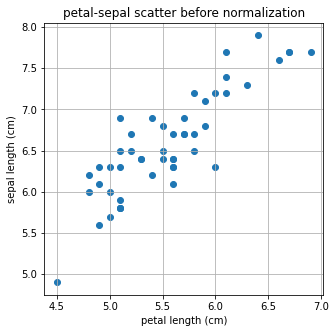

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

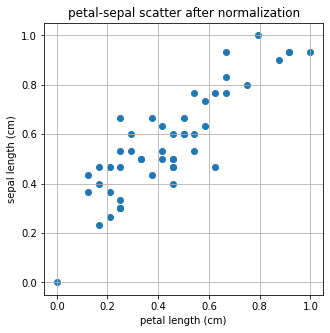

In [4]:
#normalization
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

---

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


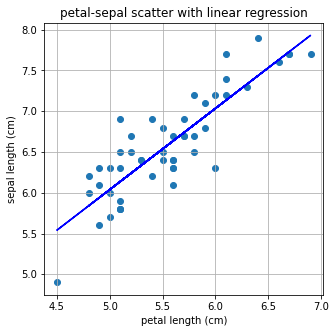

In [6]:
#Linear regression 으로 구한 기울기와 절편을 가지고 일차함수를 만들어 산점도
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


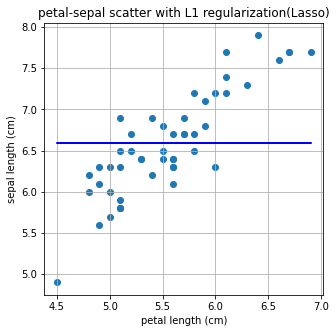

In [7]:
#L1 regularization인 Lasso

#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.93, 절편 : 1.41


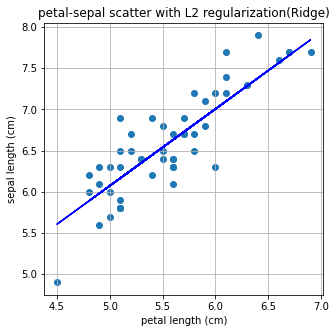

In [8]:
# L2 regularization인 Ridge

#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

- Linear Regression이 L2 Norm과 관련이 있음.
- L2 Regularization을 쓰는 Ridge방법으로는 앞서 Linear Regression과 큰 차이가 없는 결과가 나옴.

---

## L1 Regularization

In [9]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


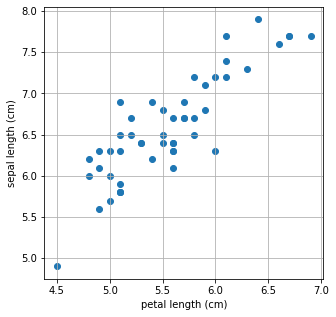

In [10]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


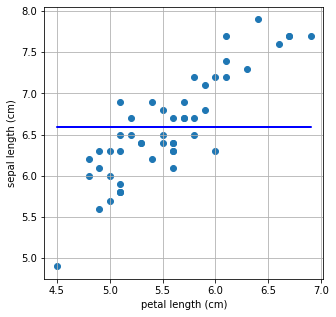

In [11]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

- 기울기가 위에서와 마찬가지로 0이 나옴.
- 계산하는 과정에서 람다가 사라지면서 regularization의 효과를 볼 수 없게 됨.
- X가 1차원 값인 선형회귀분석 같은 경우에는 L1 Regularization이 의미가 없는 것.
- L1을 사용할 땐 X가 2차원 이상인 여러 칼럼 값이 있는 데이터일 때만 효과를 볼 수 있음.

In [12]:
#wine dataset
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [13]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


In [15]:
#Linear regression 으로 문제를 풀고, 
#그 계수(coefficient)와 절대 오차(mean absolute error), 
#제곱 오차(mean squared error), 평균 제곱값 오차(root mean squared error)를 출력

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [16]:
#L1 regularization

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


-  Linear Regression에서는 모든 컬럼의 가중치를 탐색하여 구함.
- L1 Regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임.
- rror 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있음.
- 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있는 것.

---

## L2 Regularization
- 원의 형태.
- 0에 가지않고 0에 가깝게 감.
- 제곱이 들어가 있어 절댓값으로 L1 Norm을 쓰는 Lasso보다 수렴이 빠름.

In [17]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

=3


In [18]:
#L1 regularization, iteration=5회

from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.924145836492522, tolerance: 0.007479838709677421
  positive)


In [19]:
#L2 regularization, iteration=5회

from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05,max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.2511466959936429
Mean Squared Error: 0.10568076460795563
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


- L2는 Linear Regression과 같은 값이 나옴.
- L1은 위의 과정과 같은 값을 확인할 수 없음. 수렴하지 않았다는 경고도 뜸.
- 이는 아직 다른 조건들을 만족하는 답을 찾지 못했다는 의미.

### 정리하면,
-  L1 Regularization은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 차원 축소와 비슷한 역할을 하는 것이 특징.
- L2 Regularization은 0이 아닌 0에 가깝게 보내지만 제곱 텀이 있기 때문에 L1 Regularization보다는 수렴 속도가 빠름.

---

# Extra : Lp norm

In [20]:
x=np.array([1,10,1,1,1])
p=5
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


In [21]:
norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


- p가  Infinity norm의 경우는 가장 큰 숫자를 출력함.

In [22]:
#matrix norm
#주로 p가 1, 무한대인 경우만 알면 됨
#p가 1인 경우 칼럼의 합이 가장 큰 값이 출력.
#p가 무한대인 경우 로우의 합이 가장 큰 값이 출력 됨.

A=np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A=np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


# Dropout
-  몇 가지의 값들을 모든 뉴런에 전달하는 것이 아닌 확률적으로 버리면서 전달하는 기법.
- 오버피팅을 막는 Regularization layer 중 하나.
-  확률을 너무 높이면, 제대로 전달되지 않으므로 학습이 잘되지 않고, 확률을 너무 낮추는 경우는 fully connected layer와 같음. 
- fully connected layer에서 오버피팅이 생기는 경우에 주로 Dropout layer를 추가함.

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [24]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가함.확률을 0.9로 준 것
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6181 - accuracy: 0.3829
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1789 - accuracy: 0.5291
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1230 - accuracy: 0.5441
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0894 - accuracy: 0.5579
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0495 - accuracy: 0.5722


In [26]:
#dropout 없을 때 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6326 - accuracy: 0.7828
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3850 - accuracy: 0.8627
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3354 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3200 - accuracy: 0.8823
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2989 - accuracy: 0.8898


In [27]:
#overfitting 확인

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 8ms/step - loss: 2.1995 - accuracy: 0.4094 - val_loss: 1.6453 - val_accuracy: 0.6033
Epoch 2/200
117/117 [==============================] - 0s 4ms/step - loss: 1.5225 - accuracy: 0.6062 - val_loss: 1.1782 - val_accuracy: 0.6767
Epoch 3/200
117/117 [==============================] - 0s 4ms/step - loss: 1.1345 - accuracy: 0.6653 - val_loss: 0.9509 - val_accuracy: 0.7317
Epoch 4/200
117/117 [==============================] - 0s 4ms/step - loss: 0.9331 - accuracy: 0.7120 - val_loss: 0.8197 - val_accuracy: 0.7600
Epoch 5/200
117/117 [==============================] - 0s 4ms/step - loss: 0.8123 - accuracy: 0.7350 - val_loss: 0.7357 - val_accuracy: 0.7700
Epoch 6/200
117/117 [==============================] - 0s 4ms/step - loss: 0.7403 - accuracy: 0.7455 - val_loss: 0.6836 - val_accuracy: 0.7817
Epoch 7/200
117/117 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.7566 - val_loss: 0.6528 - val_accuracy: 0.7883

Epoch 58/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.8616 - val_loss: 0.3987 - val_accuracy: 0.8367
Epoch 59/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3850 - accuracy: 0.8643 - val_loss: 0.4026 - val_accuracy: 0.8333
Epoch 60/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3904 - accuracy: 0.8630 - val_loss: 0.3992 - val_accuracy: 0.8383
Epoch 61/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3900 - accuracy: 0.8619 - val_loss: 0.3966 - val_accuracy: 0.8383
Epoch 62/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3841 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8350
Epoch 63/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3882 - accuracy: 0.8624 - val_loss: 0.3935 - val_accuracy: 0.8433
Epoch 64/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3806 - accuracy: 0.8653 - val_loss: 0.3886 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3318 - accuracy: 0.8827 - val_loss: 0.3561 - val_accuracy: 0.8517
Epoch 116/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.8807 - val_loss: 0.3545 - val_accuracy: 0.8533
Epoch 117/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.8809 - val_loss: 0.3563 - val_accuracy: 0.8467
Epoch 118/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3332 - accuracy: 0.8829 - val_loss: 0.3560 - val_accuracy: 0.8550
Epoch 119/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3312 - accuracy: 0.8841 - val_loss: 0.3533 - val_accuracy: 0.8533
Epoch 120/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3374 - accuracy: 0.8821 - val_loss: 0.3531 - val_accuracy: 0.8500
Epoch 121/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3300 - accuracy: 0.8845 - val_loss: 0.3512 - val_ac

117/117 [==============================] - 0s 4ms/step - loss: 0.3015 - accuracy: 0.8927 - val_loss: 0.3342 - val_accuracy: 0.8717
Epoch 172/200
117/117 [==============================] - 0s 4ms/step - loss: 0.2997 - accuracy: 0.8926 - val_loss: 0.3384 - val_accuracy: 0.8650
Epoch 173/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3019 - accuracy: 0.8931 - val_loss: 0.3393 - val_accuracy: 0.8750
Epoch 174/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3010 - accuracy: 0.8934 - val_loss: 0.3332 - val_accuracy: 0.8683
Epoch 175/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3011 - accuracy: 0.8924 - val_loss: 0.3329 - val_accuracy: 0.8633
Epoch 176/200
117/117 [==============================] - 0s 4ms/step - loss: 0.2965 - accuracy: 0.8938 - val_loss: 0.3360 - val_accuracy: 0.8750
Epoch 177/200
117/117 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.8956 - val_loss: 0.3331 - val_accuracy: 0.8633

- overfitting이 되는지 확인해보려면 train set과 validation set의 loss function을 그려보는 것이 가장 첫 번째 시도임.
- overfitting이 나는 fully connected layer를 만들기 위해 위의 데이터를 trian:val = 99:1로 나눈 후 loss function  값을 그려볼 것.

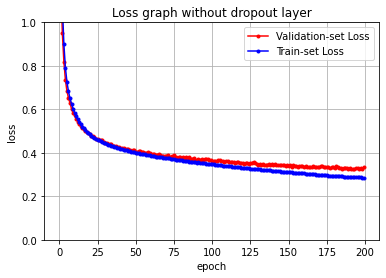

In [28]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

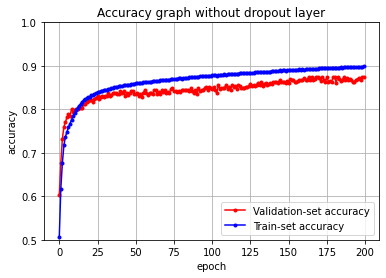

In [29]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [30]:
#오버피팅 환경은 동일, dorpoutlayer를 추가한 뒤 같은 실험 반복
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 6ms/step - loss: 2.2136 - accuracy: 0.3236 - val_loss: 1.6969 - val_accuracy: 0.6367
Epoch 2/200
117/117 [==============================] - 1s 4ms/step - loss: 1.5837 - accuracy: 0.5491 - val_loss: 1.2335 - val_accuracy: 0.6467
Epoch 3/200
117/117 [==============================] - 0s 4ms/step - loss: 1.2221 - accuracy: 0.6026 - val_loss: 1.0228 - val_accuracy: 0.6983
Epoch 4/200
117/117 [==============================] - 0s 4ms/step - loss: 1.0366 - accuracy: 0.6558 - val_loss: 0.8899 - val_accuracy: 0.7383
Epoch 5/200
117/117 [==============================] - 0s 4ms/step - loss: 0.9248 - accuracy: 0.6874 - val_loss: 0.8022 - val_accuracy: 0.7633
Epoch 6/200
117/117 [==============================] - 0s 4ms/step - loss: 0.8450 - accuracy: 0.7099 - val_loss: 0.7398 - val_accuracy: 0.7617
Epoch 7/200
117/117 [==============================] - 0s 4ms/step - loss: 0.7913 - accuracy: 0.7241 - val_loss: 0.7038 - val_accuracy: 0.7783

Epoch 58/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4344 - accuracy: 0.8480 - val_loss: 0.4046 - val_accuracy: 0.8350
Epoch 59/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4355 - accuracy: 0.8454 - val_loss: 0.4063 - val_accuracy: 0.8400
Epoch 60/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4283 - accuracy: 0.8477 - val_loss: 0.4069 - val_accuracy: 0.8333
Epoch 61/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4226 - accuracy: 0.8485 - val_loss: 0.4023 - val_accuracy: 0.8483
Epoch 62/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.8476 - val_loss: 0.4022 - val_accuracy: 0.8383
Epoch 63/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4249 - accuracy: 0.8495 - val_loss: 0.3990 - val_accuracy: 0.8367
Epoch 64/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4212 - accuracy: 0.8502 - val_loss: 0.3975 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3690 - accuracy: 0.8703 - val_loss: 0.3502 - val_accuracy: 0.8567
Epoch 116/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3712 - accuracy: 0.8697 - val_loss: 0.3494 - val_accuracy: 0.8583
Epoch 117/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3693 - accuracy: 0.8710 - val_loss: 0.3499 - val_accuracy: 0.8483
Epoch 118/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3653 - accuracy: 0.8712 - val_loss: 0.3505 - val_accuracy: 0.8550
Epoch 119/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3649 - accuracy: 0.8709 - val_loss: 0.3538 - val_accuracy: 0.8550
Epoch 120/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3652 - accuracy: 0.8710 - val_loss: 0.3515 - val_accuracy: 0.8550
Epoch 121/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3599 - accuracy: 0.8743 - val_loss: 0.3509 - val_ac

117/117 [==============================] - 0s 4ms/step - loss: 0.3394 - accuracy: 0.8815 - val_loss: 0.3265 - val_accuracy: 0.8617
Epoch 172/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3391 - accuracy: 0.8788 - val_loss: 0.3313 - val_accuracy: 0.8567
Epoch 173/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3477 - accuracy: 0.8780 - val_loss: 0.3261 - val_accuracy: 0.8700
Epoch 174/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3335 - accuracy: 0.8806 - val_loss: 0.3294 - val_accuracy: 0.8633
Epoch 175/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3329 - accuracy: 0.8811 - val_loss: 0.3251 - val_accuracy: 0.8650
Epoch 176/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3310 - accuracy: 0.8833 - val_loss: 0.3231 - val_accuracy: 0.8650
Epoch 177/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3300 - accuracy: 0.8835 - val_loss: 0.3226 - val_accuracy: 0.8617

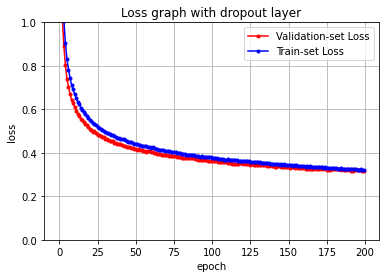

In [32]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

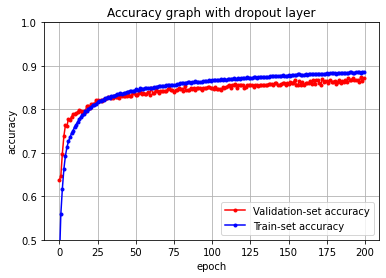

In [33]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# Batch Normalization
- gradient vanishing, explode 문제를 해결하는 방법.
- normalize 부분에서 분모에 ϵ이 추가됨. 
- 이 부분으로 인해 normalize 과정에서 gradient가 사라지거나(vanishing), 폭등하는(explode) 것을 막을 수 있음.
- ϵ 부분만 제외하면, 기존의 z-score로 normalize하는 과정과 같지만, 이 부분을 추가하는 것만으로도 오버피팅이나 학습이 잘되지 않는 것을 막을 수 있게 됨.

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [35]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [36]:
#이미지를 트레이닝하기 위해서 train / valid 를 7:3으로 분리하고, Dense layer 를 쌓아서 트레이닝

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 23ms/step - loss: 1.5992 - accuracy: 0.4705 - val_loss: 0.7476 - val_accuracy: 0.7397
Epoch 2/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6828 - accuracy: 0.7660 - val_loss: 0.5945 - val_accuracy: 0.8007
Epoch 3/20
21/21 [==============================] - 0s 11ms/step - loss: 0.5698 - accuracy: 0.8075 - val_loss: 0.5350 - val_accuracy: 0.8208
Epoch 4/20
21/21 [==============================] - 0s 11ms/step - loss: 0.5180 - accuracy: 0.8266 - val_loss: 0.5022 - val_accuracy: 0.8277
Epoch 5/20
21/21 [==============================] - 0s 11ms/step - loss: 0.4805 - accuracy: 0.8388 - val_loss: 0.4900 - val_accuracy: 0.8337
Epoch 6/20
21/21 [==============================] - 0s 11ms/step - loss: 0.4684 - accuracy: 0.8423 - val_loss: 0.4667 - val_accuracy: 0.8395
Epoch 7/20
21/21 [==============================] - 0s 11ms/step - loss: 0.4466 - accuracy: 0.8508 - val_loss: 0.4496 - val_accuracy: 0.8465
Epoch 8/20
21

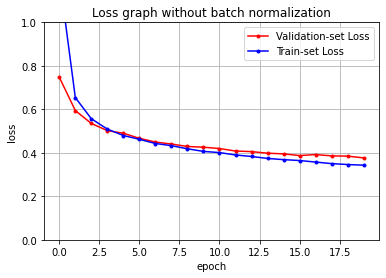

In [37]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

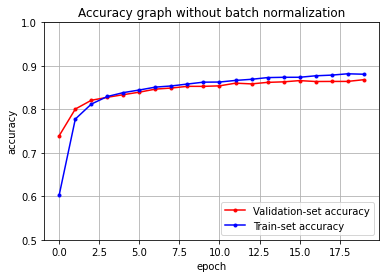

In [38]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [39]:
#BatchNoramlization layer를 추가

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 21ms/step - loss: 1.4954 - accuracy: 0.5220 - val_loss: 1.1024 - val_accuracy: 0.6153
Epoch 2/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5625 - accuracy: 0.8094 - val_loss: 0.8639 - val_accuracy: 0.7370
Epoch 3/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4685 - accuracy: 0.8395 - val_loss: 0.7621 - val_accuracy: 0.7789
Epoch 4/20
21/21 [==============================] - 0s 10ms/step - loss: 0.4210 - accuracy: 0.8543 - val_loss: 0.6793 - val_accuracy: 0.8169
Epoch 5/20
21/21 [==============================] - 0s 9ms/step - loss: 0.3905 - accuracy: 0.8649 - val_loss: 0.6495 - val_accuracy: 0.8265
Epoch 6/20
21/21 [==============================] - 0s 9ms/step - loss: 0.3628 - accuracy: 0.8746 - val_loss: 0.5936 - val_accuracy: 0.8433
Epoch 7/20
21/21 [==============================] - 0s 9ms/step - loss: 0.3489 - accuracy: 0.8777 - val_loss: 0.5620 - val_accuracy: 0.8454
Epoch 8/20
21/21 [

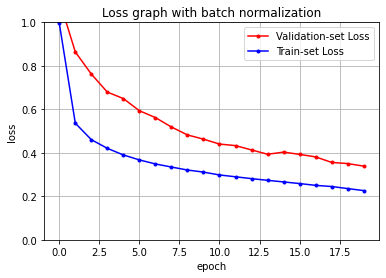

In [40]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

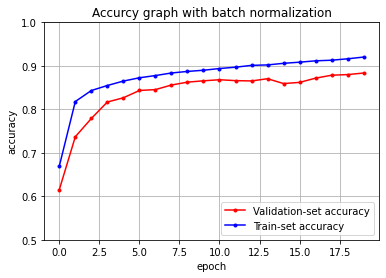

In [41]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- Batch Normalization을 추가하니 좀 더 빠르게 정확도 상승이 있음을 확인할 수 있음.
- loss 함수의 감소도 더 빨라짐을 확인할 수 있음.
- Batch Normalization으로 인해 이미지가 정규화되면서 좀 더 고른 분포를 가지기도 하며, ϵ 부분으로 인해 안정적인 학습이 가능해짐.